In [1]:
import networkx as nx
import osmnx as ox

%matplotlib inline
ox.config(log_console=True)
ox.__version__

'1.0.1'

In [2]:
G = ox.graph_from_place("La Plata", network_type="drive_service")

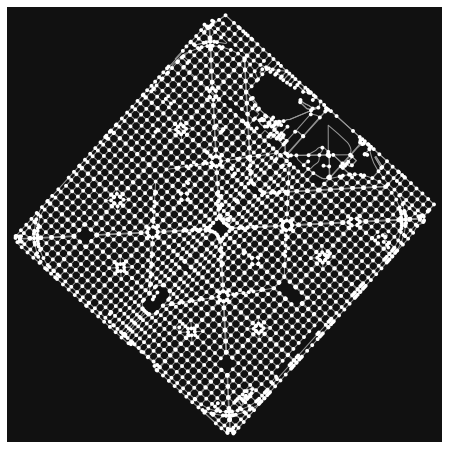

In [3]:
fig, ax = ox.plot_graph(G)

In [5]:
list(G.nodes)[0]

199803279

In [7]:
G.get_edge_data(199803279,199803280)

{0: {'osmid': 20632902,
  'oneway': True,
  'lanes': '3',
  'ref': '055-10',
  'name': 'Boulevard 84',
  'highway': 'primary',
  'maxspeed': '60',
  'length': 149.516}}

In [10]:
G.get_edge_data(list(G.nodes)[10],list(G.nodes)[11])

In [13]:
LPG = nx.DiGraph()

In [14]:
mapping = {}
for ind,ng in enumerate(list(G.nodes)):
    mapping[ng] = ind
    LPG.add_node(ind)

In [15]:
for ind, edg in enumerate(list(G.edges)):
    dd = list(edg)
    LPG.add_edge(mapping[dd[0]], mapping[dd[1]])

In [51]:
import matplotlib as pyplot

KeyboardInterrupt: 

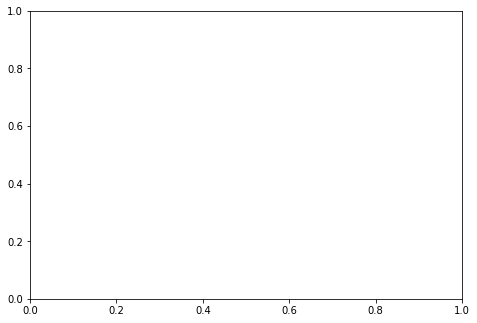

In [16]:
nx.draw(LPG)

In [7]:
M = ox.utils_graph.get_undirected(G)

In [8]:
gdf_nodes, gdf_edges = ox.graph_to_gdfs(M)
gdf_nodes.head()

,y,x,street_count,highway,geometry
osmid,,,,,
199803279,-34.916770,-57.920462,3,NaN,POINT (-57.92046 -34.91677)
199803280,-34.918008,-57.919823,3,NaN,POINT (-57.91982 -34.91801)
199803281,-34.918586,-57.919609,3,NaN,POINT (-57.91961 -34.91859)
199803284,-34.920574,-57.919381,3,NaN,POINT (-57.91938 -34.92057)
199803285,-34.921934,-57.919570,3,NaN,POINT (-57.91957 -34.92193)


In [9]:
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m

28218022.924729005

In [11]:
ox.basic_stats(G_proj, area=graph_area_m)#, clean_int_tol=15)

{'n': 2881,
 'm': 5528,
 'k_avg': 3.8375564040263797,
 'intersection_count': 2821,
 'streets_per_node_avg': 3.6702533842415828,
 'streets_per_node_counts': {0: 0, 1: 60, 2: 1, 3: 858, 4: 1892, 5: 50, 6: 20},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.020826102047900034,
  2: 0.0003471017007983339,
  3: 0.2978132592849705,
  4: 0.6567164179104478,
  5: 0.017355085039916694,
  6: 0.006942034015966678},
 'edge_length_total': 538949.0110000004,
 'edge_length_avg': 97.49439417510861,
 'street_length_total': 508948.3539999998,
 'street_length_avg': 97.83705382545172,
 'street_segments_count': 5202,
 'node_density_km': 102.09786871621048,
 'intersection_density_km': 99.97156808345359,
 'edge_density_km': 19099.460385216775,
 'street_density_km': 18036.286785846372,
 'circuity_avg': 1.2941851658316368e-05,
 'self_loop_proportion': 0.000361794500723589,
 'clean_intersection_count': None,
 'clean_intersection_density_km': None}

KeyboardInterrupt: 

In [ ]:
# color edges in original graph with closeness centralities from line graph
ec = ox.plot.get_edge_colors_by_attr(G, "edge_centrality", cmap="inferno")
fig, ax = ox.plot_graph(G, edge_color=ec, edge_linewidth=2, node_size=0)
